In [21]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')

import itertools
from collections import Counter


#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score

#resample the data
from imblearn.over_sampling import SMOTE,SMOTENC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,precision_score, recall_score,accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

#Remove warnings
import warnings
warnings.filterwarnings('ignore')




%matplotlib inline
from matplotlib.pylab import rcParams


In [63]:
df=pd.read_csv('/Users/claudiatsai/Documents/Flatiron/Phase_5/data_loan_default_prediction/selected.csv')

In [64]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,revol_util,bc_open_to_buy,bc_util,mths_since_recent_inq,num_op_rev_tl
0,3600.0,36 months,13.99,C4,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,PA,5.91,29.7,1506.0,37.2,4.0,4.0
1,24700.0,36 months,11.99,C1,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,SD,16.06,19.2,57830.0,27.1,0.0,20.0
2,20000.0,60 months,10.78,B4,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,IL,10.78,56.2,2737.0,55.9,10.0,4.0
3,35000.0,60 months,14.85,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Current,NJ,17.06,11.6,54962.0,12.1,NaN,10.0
4,10400.0,60 months,22.45,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,PA,25.37,64.5,4567.0,77.5,1.0,7.0


In [22]:
#df = pd.read_csv('accepted_2007_to_2018Q4.csv')

In [23]:
#df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [25]:
#df.shape

(2260701, 151)

In [26]:
#df.isna().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [27]:
#df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [36]:
'''
cols = ['loan_amnt', 'term','int_rate', 'sub_grade','emp_title',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl']

filename = r"/Users/claudiatsai/Documents/Flatiron/Phase_5/loan_default_prediction/accepted_2007_to_2018Q4.csv"


pd.read_csv(filename, usecols=cols).to_csv(r'/Users/claudiatsai/Documents/Flatiron/Phase_5/loan_default_prediction/selected.csv', index=False)
'''

In [47]:
df_sel= pd.read_csv('selected.csv')

In [48]:
df_sel.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,revol_util,bc_open_to_buy,bc_util,mths_since_recent_inq,num_op_rev_tl
0,3600.0,36 months,13.99,C4,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,PA,5.91,29.7,1506.0,37.2,4.0,4.0
1,24700.0,36 months,11.99,C1,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,SD,16.06,19.2,57830.0,27.1,0.0,20.0
2,20000.0,60 months,10.78,B4,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,IL,10.78,56.2,2737.0,55.9,10.0,4.0
3,35000.0,60 months,14.85,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Current,NJ,17.06,11.6,54962.0,12.1,NaN,10.0
4,10400.0,60 months,22.45,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,PA,25.37,64.5,4567.0,77.5,1.0,7.0


In [49]:
df_sel['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [50]:
array=['Charged Off', 'Fully Paid']
df_sel= df_sel.loc[df_sel['loan_status'].isin(array)]

In [51]:
df_sel['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [45]:
df_sel['bc_open_to_buy'].value_counts()

0.0         21615
2000.0       1186
500.0        1185
1000.0       1072
3000.0        978
            ...  
76035.0         1
55029.0         1
42041.0         1
87915.0         1
107774.0        1
Name: bc_open_to_buy, Length: 74924, dtype: int64

In [46]:
df_sel['bc_util'].describe()

count    1.283398e+06
mean     5.993957e+01
std      2.829322e+01
min      0.000000e+00
25%      3.830000e+01
50%      6.320000e+01
75%      8.480000e+01
max      3.396000e+02
Name: bc_util, dtype: float64

In [52]:
df_sel = df_sel[(df_sel['loan_status'] == 'Fully Paid') | (df_sel['loan_status'] == 'Charged Off')]

In [53]:
df_sel['loan_status'].value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [56]:
df_sel['loan_status'].value_counts(normalize=True)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

Text(0.5, 0, 'Loan Status')

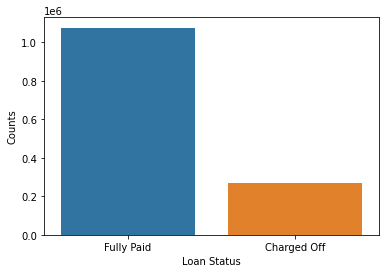

In [57]:
loan_sta = df_sel['loan_status'].value_counts()
ax = sns.barplot(x = loan_sta.index, y = loan_sta.values)
ax.set_ylabel('Counts')
ax.set_xlabel('Loan Status')

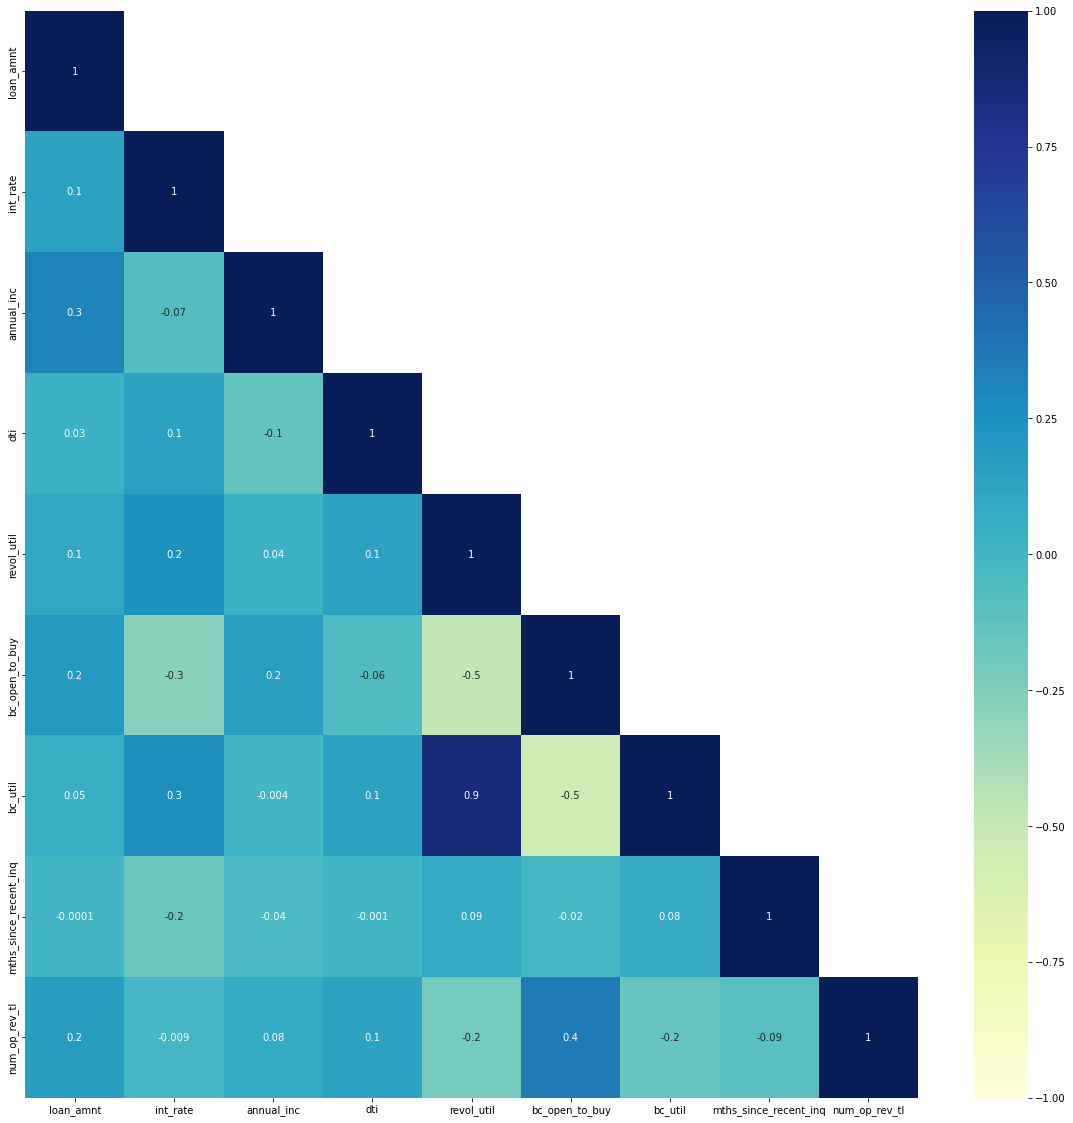

In [58]:
'''showed the lower triangular heatmap
https://datavizpyr.com/how-to-make-lower-triangular-heatmap-with-python/
'''
corr = df_sel.corr()
corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);

In [59]:
# Convert columns with yes or no to binary
label_encoder = LabelEncoder()
df_sel['loan_status'] = label_encoder.fit_transform(df_sel['loan_status'])


In [60]:
df_sel.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,revol_util,bc_open_to_buy,bc_util,mths_since_recent_inq,num_op_rev_tl
0,3600.0,36 months,13.99,C4,leadman,10+ years,MORTGAGE,55000.0,1,PA,5.91,29.7,1506.0,37.2,4.0,4.0
1,24700.0,36 months,11.99,C1,Engineer,10+ years,MORTGAGE,65000.0,1,SD,16.06,19.2,57830.0,27.1,0.0,20.0
2,20000.0,60 months,10.78,B4,truck driver,10+ years,MORTGAGE,63000.0,1,IL,10.78,56.2,2737.0,55.9,10.0,4.0
4,10400.0,60 months,22.45,F1,Contract Specialist,3 years,MORTGAGE,104433.0,1,PA,25.37,64.5,4567.0,77.5,1.0,7.0
5,11950.0,36 months,13.44,C3,Veterinary Tecnician,4 years,RENT,34000.0,1,GA,10.20,68.4,844.0,91.0,NaN,4.0
